In [3]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# loading the dataset
df=pd.read_csv('housing.csv')

In [5]:
df.shape

(20640, 10)

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


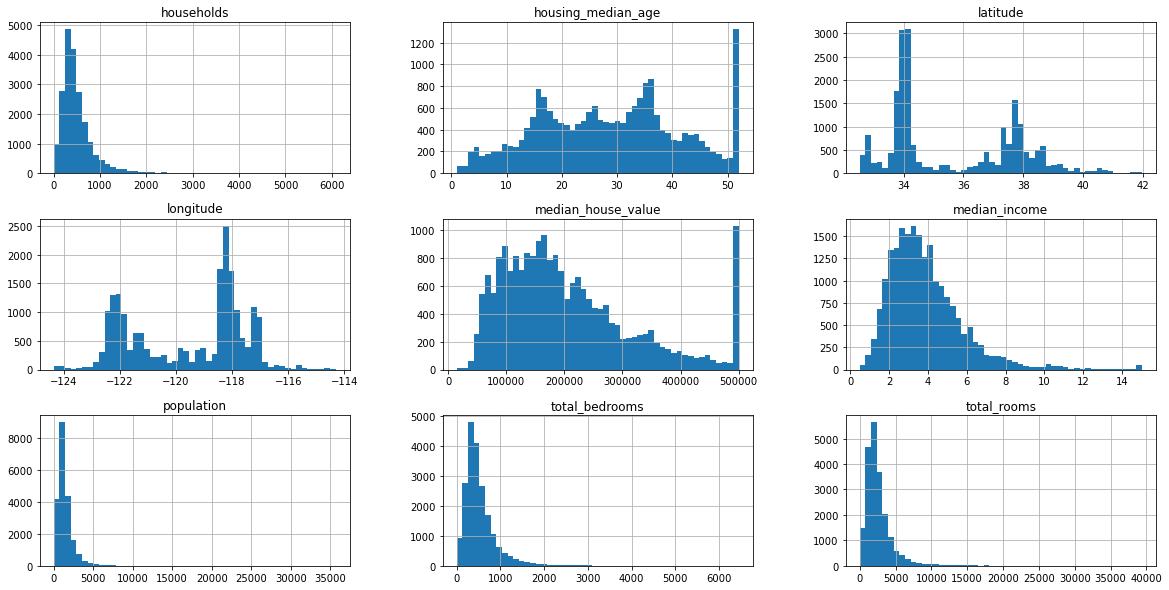

In [8]:
# y-axis gives the count and x-axis 
df.hist(bins=50, figsize=(20,10))
plt.show()

In [9]:
print(df.isnull().values.any())
print(df.isnull().sum())

True
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [10]:
df.fillna(df.median(), inplace=True)

In [11]:
status = pd.get_dummies(df['ocean_proximity'])
status.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [12]:
status = pd.get_dummies(df['ocean_proximity'], drop_first = True)
status.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [13]:
df = pd.DataFrame(pd.concat([df, status], axis = 1))
df.drop(['ocean_proximity'], axis = 1, inplace = True)
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,1,0,0,0


Text(0.5, 1.0, 'Distribution of households')

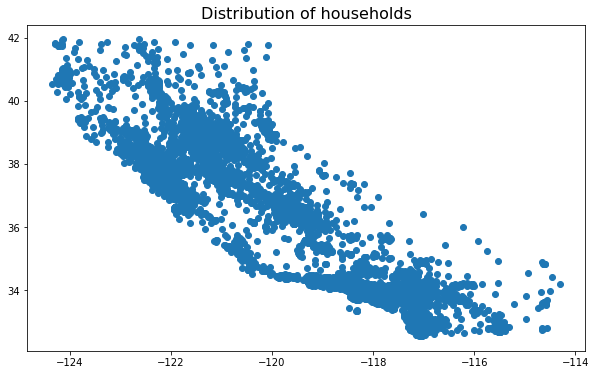

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['longitude'],y=df['latitude'])
plt.title("Distribution of households",size=16)

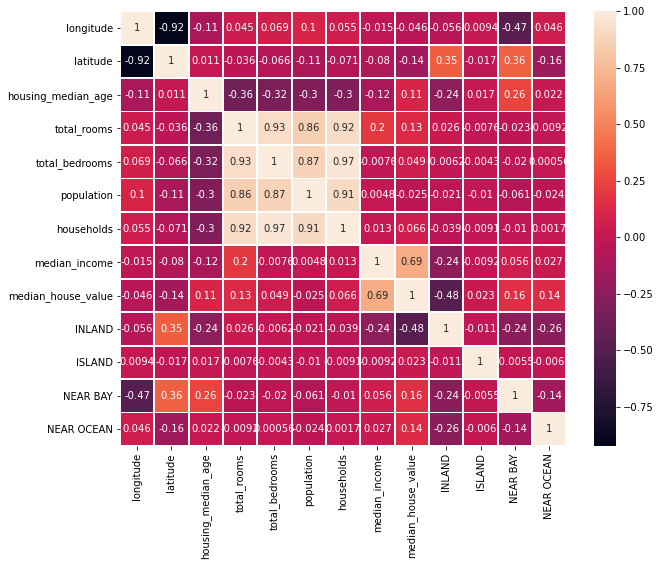

In [15]:
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(df.corr(),annot=True, linewidths=.8, ax=ax)

In [16]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# high correlation with median_income

median_house_value    1.000000
median_income         0.688075
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

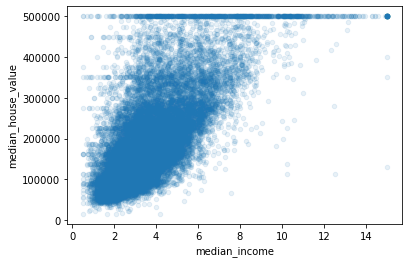

In [17]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

## Creating new features

In [18]:
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]
df["rooms_per_household"] = df["total_rooms"]/df["households"]

In [19]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# the new bedrooms_per_room is highly correlated but in a reciprocative way to the median_house_value,
#So the houses with lesser bedroom/room ratio will tend to be more expensive.

median_house_value          1.000000
median_income               0.688075
NEAR BAY                    0.160284
rooms_per_household         0.151948
NEAR OCEAN                  0.141862
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
ISLAND                      0.023416
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
INLAND                     -0.484859
Name: median_house_value, dtype: float64

In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_per_room,population_per_household,rooms_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,0.317393,0.000242,0.110950,0.128779,0.213794,3.070655,5.429000
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.465473,0.015563,0.314077,0.334963,0.065248,10.386050,2.474173
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.037151,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.175225,2.429741,4.440716
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.203159,2.818116,5.229129
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,0.000000,0.000000,0.000000,0.240126,3.282261,6.052381
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,2.824675,1243.333333,141.909091


In [21]:
df["income_cat"] = np.ceil(df["median_income"]/ 1.5)
print("Placing into categories: \n",df["income_cat"].head())

df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)
print("Placing all categories above 5 to 5th category: \n",df["income_cat"].head())

Placing into categories: 
 0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64
Placing all categories above 5 to 5th category: 
 0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in sss.split(df, df['income_cat']):
    x_train = df.loc[train_index]
    x_test = df.loc[test_index]

In [23]:
df["income_cat"].value_counts()/ len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [24]:
print(x_train['income_cat'].value_counts()/ len(x_train))
print(x_test['income_cat'].value_counts()/ len(x_test))

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


In [25]:
# experimenting
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(df, test_size=0.2, random_state=29)

In [26]:
for columns in (x_train, x_test, df):
    columns.drop("income_cat", axis=1, inplace=True)

In [27]:
y_train=x_train['median_house_value']
y_test=x_test['median_house_value']

x_train = x_train.drop('median_house_value', axis=1)
x_test= x_test.drop('median_house_value', axis=1)
#x_exp = x_train["median_house_value"].copy()

In [28]:
print(x_train.head())
print(y_train.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7771     -118.09     33.92                35.0       1994.0           419.0   
9352     -122.57     37.96                52.0       3458.0           468.0   
18657    -121.96     36.97                23.0       4324.0          1034.0   
4873     -118.28     34.02                52.0        281.0           103.0   
12350    -116.50     33.81                26.0       5032.0          1229.0   

       population  households  median_income  INLAND  ISLAND  NEAR BAY  \
7771       1491.0       428.0         3.7383       0       0         0   
9352       1449.0       471.0         9.1834       0       0         1   
18657      1844.0       875.0         3.0777       0       0         0   
4873        470.0        96.0         1.9375       0       0         0   
12350      3086.0      1183.0         2.5399       1       0         0   

       NEAR OCEAN  bedrooms_per_room  population_per_household  \
7771          

In [29]:
columns=['longitude','latitude','housing_median_age','total_rooms', 'total_bedrooms','population','households','median_income',
               'bedrooms_per_room','population_per_household','rooms_per_household']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[columns] = scaler.fit_transform(x_train[columns])
x_test[columns] = scaler.transform(x_test[columns])

In [30]:
print(x_train.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7771    0.740493 -0.804028            0.506161    -0.289293       -0.274854   
9352   -1.493918  1.081436            1.862351     0.384975       -0.157949   
18657  -1.189679  0.619404           -0.451150     0.783825        1.192418   
4873    0.645730 -0.757358            1.862351    -1.078241       -1.028769   
12350   1.533509 -0.855365           -0.211823     1.109905        1.657650   

       population  households  median_income  INLAND  ISLAND  NEAR BAY  \
7771     0.063785   -0.180190      -0.069372       0       0         0   
9352     0.026861   -0.067678       2.791087       0       0         1   
18657    0.374128    0.989407      -0.416403       0       0         0   
4873    -0.833836   -1.048884      -1.015381       0       0         0   
12350    1.466044    1.795304      -0.698924       1       0         0   

       NEAR OCEAN  bedrooms_per_room  population_per_household  \
7771          

## Creating models

## Linear regression

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [32]:
reg.coef_

array([-54670.13331891, -55590.31679867,  13095.92734717,  -3726.56118755,
         9767.65519675, -44733.42690523,  43415.98321969,  74404.11205651,
       -38509.73973152, 153395.57377422,  -4553.39412111,   3672.4874947 ,
         8783.41984336,    961.02163599,   6838.47333523])

In [33]:
y_pred = reg.predict(x_test)
y_pred=pd.DataFrame(y_pred)
print(y_pred.head())
print(y_pred.shape)

               0
0  293704.703680
1  127141.695859
2  210764.426305
3  263316.803966
4  147801.559759
(4128, 1)


In [34]:
y_test=np.array(y_test)
y_test=y_test[:,np.newaxis]
print(y_test.shape) # now converted to matrix

# first column displays our predicted values and 2nd column the true y values
print(np.hstack((y_pred,y_test)))

(4128, 1)
[[293704.70367993 225000.        ]
 [127141.69585922 125900.        ]
 [210764.42630541 165600.        ]
 ...
 [298569.8405491  500001.        ]
 [131866.52978495 105400.        ]
 [168779.07293764 162200.        ]]


In [35]:
# MSE AND RMSE
from sklearn import metrics

reg_mse=metrics.mean_squared_error(y_test, y_pred)
print("Regression MSE: ", mse)

reg_rmse=np.sqrt(reg_mse)
print("Regression RMSE:", rmse)

NameError: name 'mse' is not defined

## DecisionTreeRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)
#print(y_train)

DecisionTreeRegressor()

In [38]:
y_pred = tree_reg.predict(x_test)
y_pred=pd.DataFrame(y_pred)

print(y_pred.head())
print(y_pred.shape)

          0
0  150000.0
1  111800.0
2  145000.0
3  238800.0
4  106200.0
(4128, 1)


In [39]:
#y_test=np.array(y_test)
#y_test=y_test[:,np.newaxis]
#print(y_test.shape) # now converted to matrix
# first column displays our predicted values and 2nd column the true y values
print(np.hstack((y_pred,y_test)))

[[150000. 225000.]
 [111800. 125900.]
 [145000. 165600.]
 ...
 [408500. 500001.]
 [112900. 105400.]
 [125000. 162200.]]


In [40]:
# MSE AND RMSE
from sklearn import metrics

tree_mse=metrics.mean_squared_error(y_test, y_pred)
print("Tree MSE: ",tree_mse)

tree_rmse=np.sqrt(tree_mse)
print("Tree RMSE:", tree_rmse)

Tree MSE:  5411466772.527374
Tree RMSE: 73562.6724128982


## RandomForestRegressor

In [41]:
# Perform Random Forest Regression on training data
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(x_train, y_train)

# Predict output for test dataset using the fitted model

y_pred = rf_reg.predict(x_test)
y_pred=pd.DataFrame(y_pred)


print(np.hstack((y_pred,y_test)))

# Print root mean squared error from Random Forest Regression

from sklearn import metrics
rf_mse = metrics.mean_squared_error(y_test, y_pred)
print("RF MSE: ",rf_mse)

rf_rmse=np.sqrt(rf_mse)
print("RF RMSE:", rf_rmse)

[[371816.15 225000.  ]
 [127068.   125900.  ]
 [132422.   165600.  ]
 ...
 [351348.12 500001.  ]
 [116987.   105400.  ]
 [137892.   162200.  ]]
RF MSE:  2573924277.263963
RF RMSE: 50733.857307166814


## Cross validation

In [42]:
from sklearn.model_selection import cross_val_score

reg_scores =cross_val_score(reg, x_train , y_train, cv=10, scoring="neg_root_mean_squared_error")

print("RMSE CROSS VAL: ", reg_scores)
print("MEAN CROSS VAL RMSE : ",abs(reg_scores.mean()))

RMSE CROSS VAL:  [-67644.44493299 -69246.12785631 -65693.83965042 -67584.23312529
 -66585.05722846 -66938.80385271 -67399.42879475 -69812.78816958
 -66663.4430341  -74885.39272005]
MEAN CROSS VAL RMSE :  68245.35593646535


In [43]:
from sklearn.model_selection import cross_val_score

tree_scores=cross_val_score(tree_reg, x_train , y_train, cv=10, scoring="neg_root_mean_squared_error")

print("RMSE CROSS VAL: ",tree_scores)
print("MEAN CROSS VAL RMSE : ",abs(tree_scores.mean()))

RMSE CROSS VAL:  [-70293.31653718 -68761.71371339 -68765.82702718 -71691.09316315
 -69752.87150897 -68056.20038572 -70763.90977489 -71033.21302769
 -68252.11560081 -69103.97387015]
MEAN CROSS VAL RMSE :  69647.42346091359


In [44]:
from sklearn.model_selection import cross_val_score

rf_scores=cross_val_score(rf_reg, x_train , y_train, cv=10, scoring="neg_root_mean_squared_error")

print("RMSE CROSS VAL: ",rf_scores)
print("MEAN CROSS VAL RMSE : ",abs(rf_scores.mean()))

RMSE CROSS VAL:  [-49035.54748092 -49315.8646592  -47704.90773694 -49356.62737592
 -49318.95465074 -49776.86590011 -49081.5181224  -49330.76830737
 -48458.49831103 -52513.43720921]
MEAN CROSS VAL RMSE :  49389.29897538455


## Hypertuning

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = [
   {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
#param_grid = {
    #'bootstrap': [True],
    #'max_depth': [80, 90, 100],
    #'max_features': [2, 3],
    #'min_samples_split': [8, 10, 12],
    #'n_estimators': [100, 200, 300]
#}

In [46]:
rf_reg = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(rf_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid=[{'max_features': [2, 3, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [52]:
# to get the best combination of hyperparameters
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [53]:
# to get the best estimators directly
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=0)

In [54]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

63120.82577604311 {'max_features': 2, 'n_estimators': 3}
54798.60987767142 {'max_features': 2, 'n_estimators': 10}
52064.780373994785 {'max_features': 2, 'n_estimators': 30}
61078.987631332006 {'max_features': 3, 'n_estimators': 3}
52795.979361216276 {'max_features': 3, 'n_estimators': 10}
50190.71303188468 {'max_features': 3, 'n_estimators': 30}
59745.708867073634 {'max_features': 4, 'n_estimators': 3}
51793.46350225751 {'max_features': 4, 'n_estimators': 10}
49674.7663183138 {'max_features': 4, 'n_estimators': 30}
58387.890466001474 {'max_features': 6, 'n_estimators': 3}
51392.53414933813 {'max_features': 6, 'n_estimators': 10}
49710.02248232264 {'max_features': 6, 'n_estimators': 30}
58241.66908299487 {'max_features': 8, 'n_estimators': 3}
52186.523739969445 {'max_features': 8, 'n_estimators': 10}
49817.76786630413 {'max_features': 8, 'n_estimators': 30}
61342.497824292 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53514.20413280529 {'bootstrap': False, 'max_features': 

In [55]:
final_model = grid_search.best_estimator_
print(final_model)

final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)
y_pred=pd.DataFrame(y_pred)


print(np.hstack((y_pred,y_test)))

# Print root mean squared error from Random Forest Regression

from sklearn import metrics

final_mse = metrics.mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
print("Final RMSE: ",final_rmse)

RandomForestRegressor(max_features=4, n_estimators=30, random_state=0)
[[363793.43333333 225000.        ]
 [124136.66666667 125900.        ]
 [130740.03333333 165600.        ]
 ...
 [326733.46666667 500001.        ]
 [124313.33333333 105400.        ]
 [149543.33333333 162200.        ]]
Final RMSE:  51164.99308997485
